<a href="https://colab.research.google.com/github/Fercaspe/Data-UY/blob/main/Ejercicio_Scikitlearn_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio Básico de ML - Construcción de un pipeline para realizar un modelo de predicción

## Contexto
El conjunto de datos con el que trabajaremos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales de Estados Unidos. El objetivo del ejercicio es predecir si un paciente tiene diabetes o no, basándose en ciertas mediciones diagnósticas incluidas en el conjunto de datos. Se impusieron varias restricciones en la selección de estas instancias a partir de una base de datos más grande. En particular, todos los pacientes aquí son mujeres de al menos 21 años de edad y de ascendencia indígena Pima.

## Contenido
El conjunto de datos consta de varias variables predictoras médicas y una variable objetivo, denominada Outcome (resultado). Las variables predictoras incluyen el número de embarazos que ha tenido la paciente, su índice de masa corporal (IMC), nivel de insulina, edad, entre otros.

## Referencia original (por si alguien tiene curiosidad)
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.



# Actividades

0. En función de la descripción del problema, qué tipo de problema debemos resolver? es un problema de regresión o de clasificación?
1. Lee en un dataframe el archivo de datos que se encuentra en https://raw.githubusercontent.com/gustavovazquez/datasets/refs/heads/main/diabetes_copy.csv
2. Muestra el contenido inicial del dataframe (head)
3. Haz una descripción del contenido (describe)
4. Muestra los tipos de las variables del dataframe (dtypes)
5. Verás que hay una columna que tiene un ID para cada paciente. Como hemos mencionado, las columnas que hacen referencia a IDs no deben ser parte del modelo. Puedes borrarla -drop- o mejor, copia los valores de los IDs en los nombres de las filas (la segunda opción sería la indicada en caso de que los IDs hagan referencia específicamente al paciente, por ej. usando un nro de cédula).
6. Obtén la matriz de correlación y revisa si hay predictores correlacionados. Si los hay, elimina alguno con un criterio definido.
7. Convierte las columnas categóricas a su codificación one-hot-ecoding
8. Arma un pipeline con dos etapas: normalización (minmaxscaler) y el método de machine learning indicado para el tipo de problema (regresión lineal o logística?)
9. Calcula las métricas clásicas (según el tipo de problema supervisado que estamos considerando).

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:


df = pd.read_csv('https://raw.githubusercontent.com/gustavovazquez/datasets/refs/heads/main/diabetes_copy.csv')
df.head()

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
df.drop(columns=['ID'], inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


<Axes: >

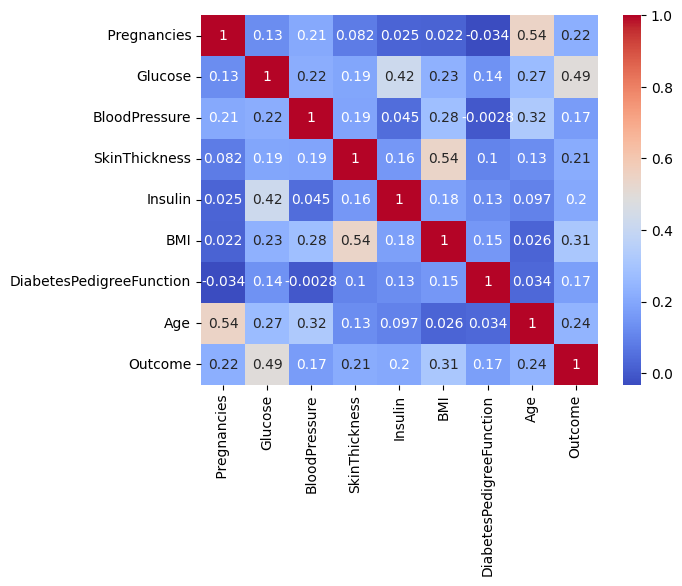

In [ ]:
mat_corr = df.corr()
sns.heatmap(mat_corr, annot=True,  cmap='coolwarm')

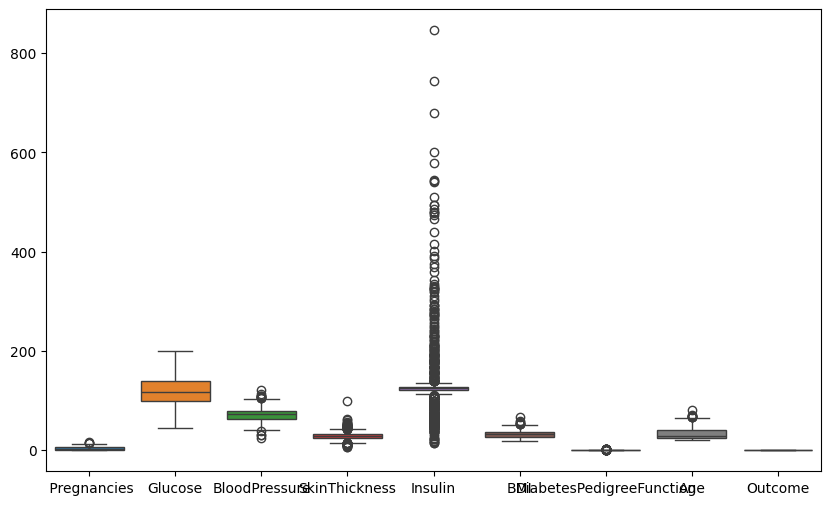

In [ ]:
# construir boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.show()


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:

x = df.drop(columns=['Outcome'])
y = df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
pipe = Pipeline([ ("normalizacion", MinMaxScaler()), ("logistica", LogisticRegression())    ])


In [ ]:
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7402597402597403


In [ ]:
# y si quiero predecir algún caso particular?
#                      Pregnancies	Glucose	BloodPressure	SkinThickness	Insulin	BMI	   DiabetesPedigreeFunction	Age
print(pipe.predict([[     1,           185,        66,          29,        10,   26.6,           0.351,          31]]))


[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
pipe_knn = Pipeline([ ("normalizacion", MinMaxScaler()), ("knn", KNN(n_neighbors=7))    ])
pipe_knn.fit(x_train, y_train)
y_pred_knn = pipe_knn.predict(x_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy KNN:", accuracy_knn)


Accuracy KNN: 0.7489177489177489
